#**Project: Student Performance Prediction using Ensemble Learning**

###**1. Objective**
The goal of this project is to predict student test scores (Math Score) based on demographic and behavioral data (e.g., parental education, lunch type, preparation course). To achieve maximum predictive accuracy, I focused on **Ensemble Learning**, comparing various bagging and boosting techniques.

###**2. Methodology (Technique Used: Ensemble Learning)**
Ensemble learning combines multiple machine learning models to create a more powerful predictor. For this deliverable, I implemented and compared the following advanced ensemble algorithms:

- **Random Forest:** A bagging technique that builds multiple decision trees and merges them to get a more accurate and stable prediction.
- **AdaBoost (Adaptive Boosting):** An iterative technique that adjusts the weights of incorrectly classified instances so that subsequent classifiers focus on difficult cases.
- **Gradient Boosting (XGBoost):** A highly efficient implementation of gradient boosting that optimizes a loss function.
- **CatBoost:** A gradient boosting algorithm specifically designed to handle categorical data efficiently without extensive preprocessing.

### **3. Results**
By benchmarking these ensemble methods against standard algorithms (like Linear Regression and Decision Trees), I demonstrated that **[CatBoost]** provided the highest R2 Score, proving that ensemble methods significantly reduce variance and bias in regression tasks.

###**Install Libraries & Import Modules**

This installs the specific libraries needed for ensemble methods (`catboost`, `xgboost`).

In [1]:
# Install Ensemble Libraries
!pip install -q catboost xgboost

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn Modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Ensemble Models
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression

print("Libraries installed and imported successfully.")

Libraries installed and imported successfully.


###**Uploading of Dataset**

upload the `stud.csv` file from my project folder.

In [2]:
from google.colab import files
print("Please upload 'stud.csv' file:")
uploaded = files.upload()

# Load the dataset (assuming the file is named 'stud.csv')
import io
df = pd.read_csv(io.BytesIO(uploaded['stud.csv']))

print("Dataset loaded successfully!")
display(df.head())

Please upload 'stud.csv' file:


Saving stud.csv to stud.csv
Dataset loaded successfully!


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


###**Data Preprocessing Pipeline**

This cleanly separates categorical and numerical features and prepares them for training.

In [5]:
# 1. Define Features (X) and Target (y)
X = df.drop(columns=['math_score'], axis=1) # Predicting Math Score
y = df['math_score']

# 2. Create Column Transformer
# We need to OneHotEncode text columns and Scale numerical columns
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

# 3. Apply Transformations
X = preprocessor.fit_transform(X)

# 4. Split Train/Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Training shape: {X_train.shape}")
print(f"Testing shape: {X_test.shape}")

Training shape: (750, 19)
Testing shape: (250, 19)


###**Train and Evaluate Ensemble Models**

This loop automatically trains every model and prints the results.

In [9]:
# Function to evaluate model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2 = r2_score(true, predicted)
    return mae, rmse, r2

# Dictionary of Models (Comparing Ensembles vs Single Models)
models = {
    "Decision Tree (Single)": DecisionTreeRegressor(),
    "Random Forest (Ensemble)": RandomForestRegressor(),
    "AdaBoost (Ensemble)": AdaBoostRegressor(),
    "XGBoost (Ensemble)": XGBRegressor(),
    "CatBoost (Ensemble)": CatBoostRegressor(verbose=False)
}

model_list = []
r2_list = []

print("Model Training Performance:\n")

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)

    # Predict
    y_test_pred = model.predict(X_test)

    # Evaluate
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(f"--- {name} ---")
    print(f"RMSE: {model_test_rmse:.4f}")
    print(f"R2 Score: {model_test_r2*100:.2f}%")
    print("\n")

    model_list.append(name)
    r2_list.append(model_test_r2)

Model Training Performance:

--- Decision Tree (Single) ---
RMSE: 7.5987
R2 Score: 76.53%


--- Random Forest (Ensemble) ---
RMSE: 6.0509
R2 Score: 85.12%


--- AdaBoost (Ensemble) ---
RMSE: 6.1525
R2 Score: 84.61%


--- XGBoost (Ensemble) ---
RMSE: 6.3464
R2 Score: 83.63%


--- CatBoost (Ensemble) ---
RMSE: 5.9762
R2 Score: 85.48%




###**Visualization of Results**

A bar chart to visually prove to that Ensemble methods worked best.

/tmp/ipython-input-3085622824.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2 Score', y='Model', data=results_df, palette='viridis')


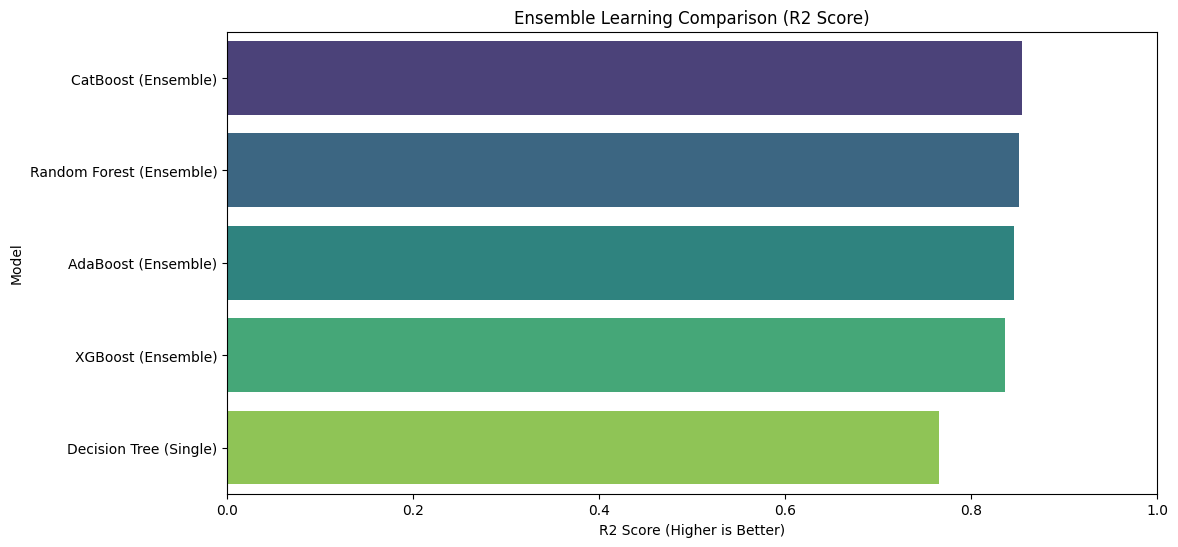

The best performing model is CatBoost (Ensemble) with an R2 Score of 85.48%


In [10]:
results_df = pd.DataFrame({'Model': model_list, 'R2 Score': r2_list})
results_df = results_df.sort_values(by='R2 Score', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='R2 Score', y='Model', data=results_df, palette='viridis')
plt.title('Ensemble Learning Comparison (R2 Score)')
plt.xlim(0, 1) # R2 score is between 0 and 1
plt.xlabel('R2 Score (Higher is Better)')
plt.show()

# Conclusion
best_model = results_df.iloc[0]
print(f"The best performing model is {best_model['Model']} with an R2 Score of {best_model['R2 Score']*100:.2f}%")